<a href="https://colab.research.google.com/github/Mahnoor-14/MachineLearningAlgorithm/blob/main/ML__Project_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multilinear Regression &amp; Polynomial Regression**

### *Importing Libraries*

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Data Preprocessing

### *Loading Data*


In [1]:
#downloaded from Kaggle
#uploaded to drive
#mounted gDrive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
data = pd.read_csv('/content/drive/MyDrive/ATom/ML_project1/StudentsPerformance.csv')
print(data.head())
print('Data Shape ',data.shape)
print(data.info())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
Data Shape  (1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     

In [60]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Checking Missing Values

In [61]:
data.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


It seems that dataset have no empty cells

In [62]:
data.duplicated().sum()

np.int64(0)

In [63]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [64]:
#Exploring unique values
print(data.nunique())
for columns in categorical_data:
  print('\ncolumn name:',columns)
  print(categorical_data[columns].nunique())
  print(categorical_data[columns].unique())


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

column name: gender
2
['female' 'male']

column name: race/ethnicity
5
['group B' 'group C' 'group A' 'group D' 'group E']

column name: parental level of education
6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

column name: lunch
2
['standard' 'free/reduced']

column name: test preparation course
2
['none' 'completed']


In [65]:
#Merging high school and some high school in Parental leel education column
data['parental level of education'] = data['parental level of education'].replace('some high school', 'high school')
#Lets update again categorical Data
categorical_data = data.select_dtypes(include=['object'])
categorical_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [66]:
integral_data = data.select_dtypes(include=['int64'])
integral_data.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


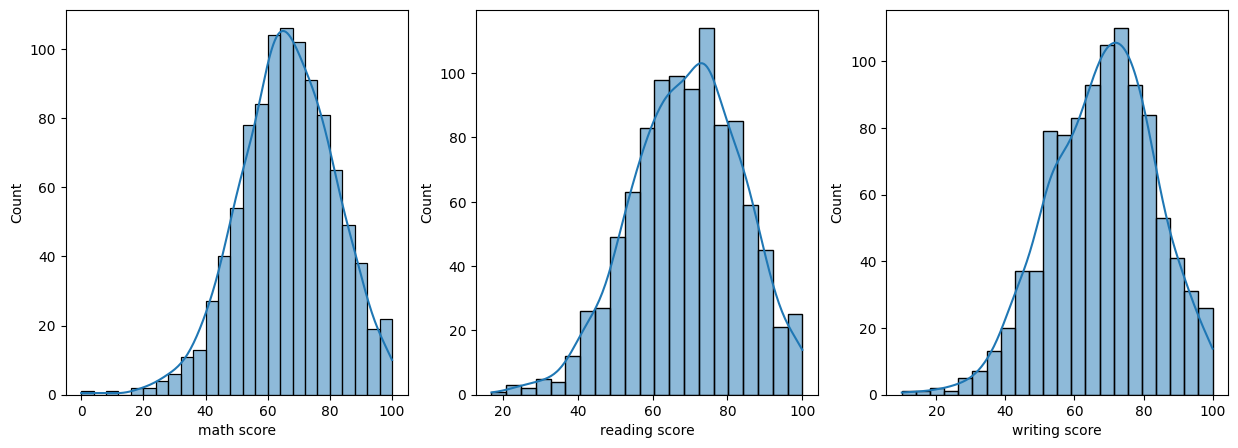

In [74]:
plt.figure(figsize=(15,5))
for i,columns in enumerate(integral_data.columns,1):
  plt.subplot(1,3,i)
  sns.histplot(integral_data[columns], kde=True)

plt.show()


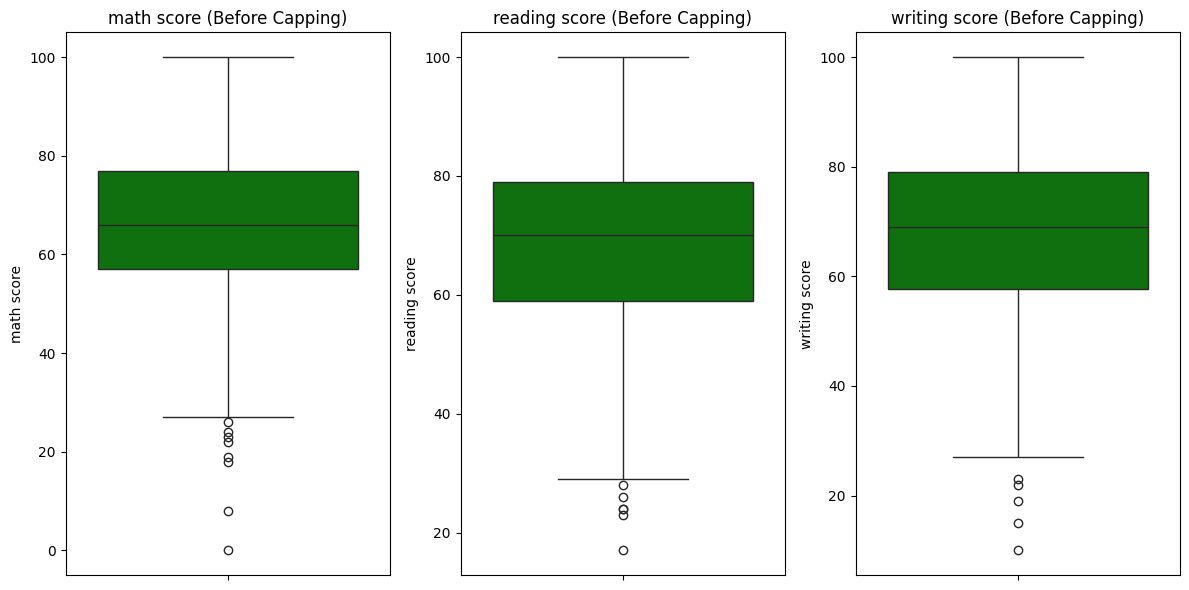

In [75]:
plt.figure(figsize=(12, 6))
for i,columns in enumerate(integral_data,1):
  plt.subplot( 1, 3, i)
  sns.boxplot(y=integral_data[columns], color='green')
  plt.title(f'{columns} (Before Capping)')

plt.tight_layout()
plt.show()

Capping

In [76]:
# Capping using IQR bounds
for col in integral_data:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

    print(f"{col} capped between {lower_bound:.2f} and {upper_bound:.2f}")


math score capped between 27.00 and 107.00
reading score capped between 29.00 and 109.00
writing score capped between 25.88 and 110.88


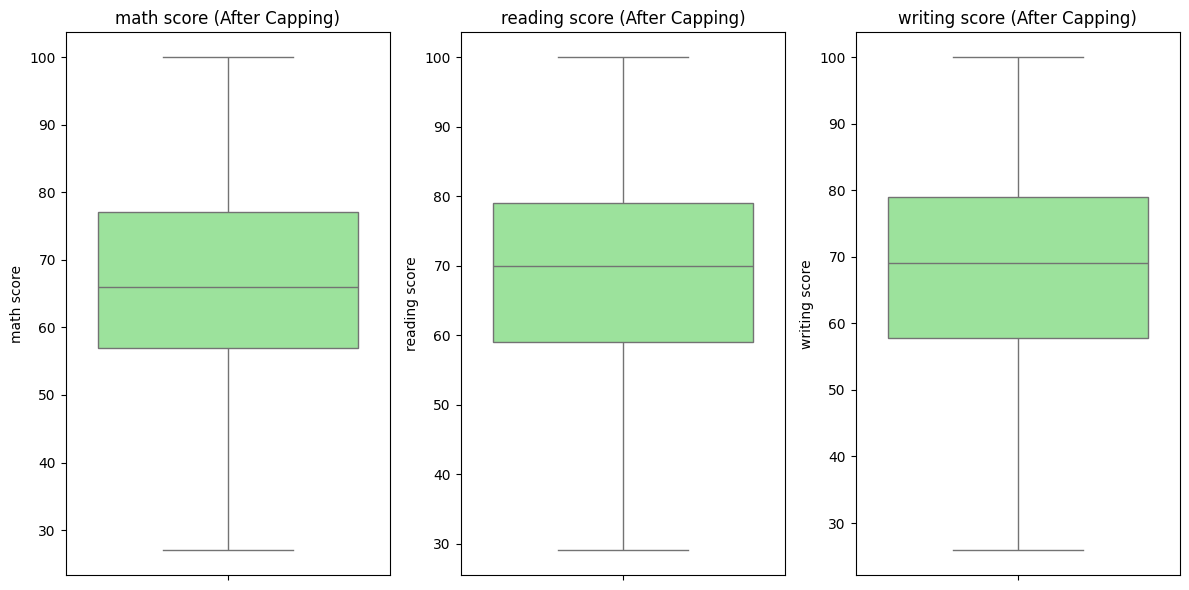

In [77]:
# Plot boxplots to compare
plt.figure(figsize=(12, 6))
for i, col in enumerate(integral_data, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[col], color='lightgreen')
    plt.title(f'{col} (After Capping)')
plt.tight_layout()
plt.show()


### Encoding categorical variables

In [78]:
print(categorical_data.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
dtype: object


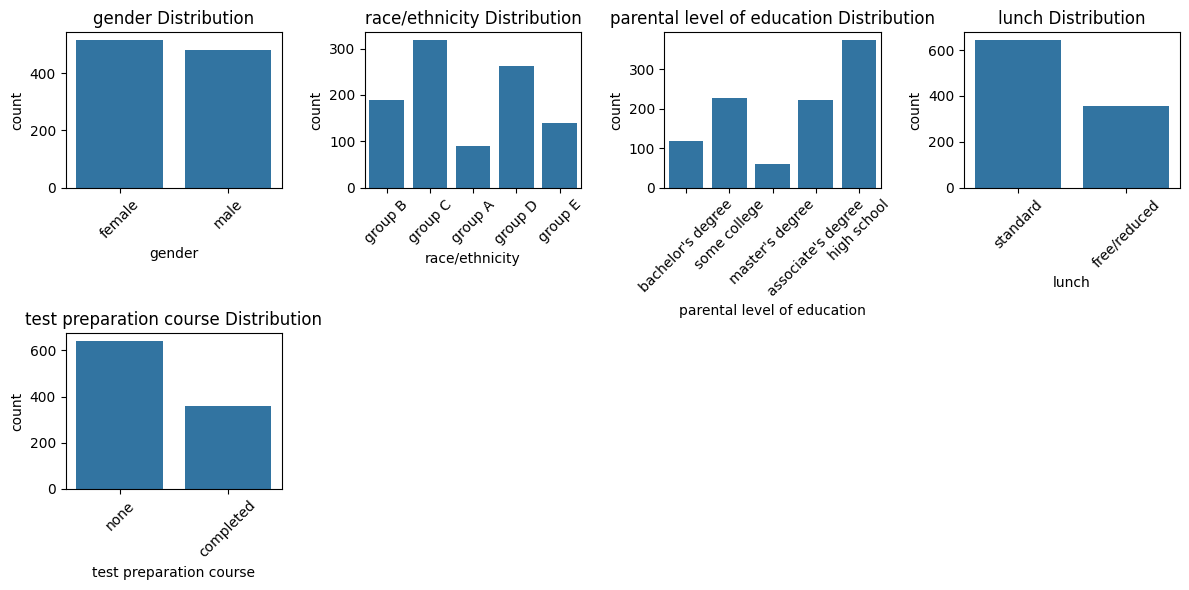

In [83]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_data, 1):
  plt.subplot(2, 4, i)
  sns.countplot(data=data, x=col)
  plt.title(f'{col} Distribution')
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [84]:
# Apply One-Hot Encoding
encoded_data = pd.get_dummies(data, columns=categorical_data.columns, drop_first=True).astype(int)

# Now `data_encoded` is ready for regression analysis
print(encoded_data.head())

   math score  reading score  writing score  gender_male  \
0          72             72             74            0   
1          69             90             88            0   
2          90             95             93            0   
3          47             57             44            1   
4          76             78             75            1   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                       1                       0                       0   
1                       0                       1                       0   
2                       1                       0                       0   
3                       0                       0                       0   
4                       0                       1                       0   

   race/ethnicity_group E  parental level of education_bachelor's degree  \
0                       0                                              1   
1                       

In [85]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   math score                                     1000 non-null   int64
 1   reading score                                  1000 non-null   int64
 2   writing score                                  1000 non-null   int64
 3   gender_male                                    1000 non-null   int64
 4   race/ethnicity_group B                         1000 non-null   int64
 5   race/ethnicity_group C                         1000 non-null   int64
 6   race/ethnicity_group D                         1000 non-null   int64
 7   race/ethnicity_group E                         1000 non-null   int64
 8   parental level of education_bachelor's degree  1000 non-null   int64
 9   parental level of education_high school        1000 non-null   int64
 10  p

### Normalizing Data

In [86]:
numerical_cols = ['math score', 'reading score', 'writing score']

numerical_data = encoded_data[numerical_cols]
categorical_data = encoded_data.drop(columns=numerical_cols)

In [87]:
numerical_cols = ['math score', 'reading score', 'writing score']

numerical_data = encoded_data[numerical_cols]
categorical_data = encoded_data.drop(columns=numerical_cols)

scaler = StandardScaler()
numerical_scaled = pd.DataFrame(scaler.fit_transform(numerical_data),
                               columns=[col + '_scaled' for col in numerical_cols])

# Combine scaled numerical features + categorical features
final_data = pd.concat([numerical_scaled, categorical_data], axis=1)

print(final_data.head())



   math score_scaled  reading score_scaled  writing score_scaled  gender_male  \
0           0.391218              0.193085              0.392086            0   
1           0.190078              1.434787              1.320886            0   
2           1.598061              1.779704              1.652600            0   
3          -1.284952             -0.841667             -1.598199            1   
4           0.659405              0.606986              0.458429            1   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                       1                       0                       0   
1                       0                       1                       0   
2                       1                       0                       0   
3                       0                       0                       0   
4                       0                       1                       0   

   race/ethnicity_group E  parental level of educa

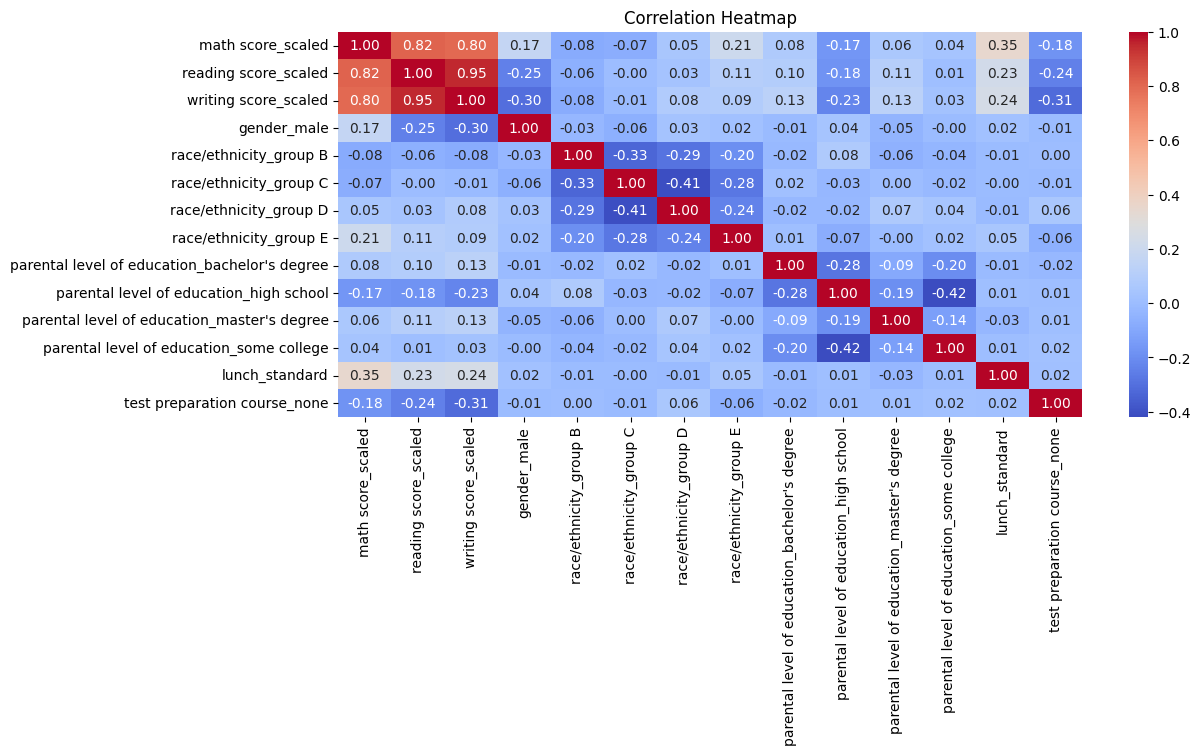

In [109]:

plt.figure(figsize=(12, 5))
sns.heatmap(final_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering

In [88]:
#relevant feature to prdict Maths score

X = final_data.drop(columns=['math score_scaled','race/ethnicity_group B','race/ethnicity_group C','race/ethnicity_group D','race/ethnicity_group E'])
#X = final_data.drop(columns=['math score_scaled','gender_m'])

# Target variable
y = final_data['math score_scaled']


## Model Building

## **Multilinear Regression Model Without Race Group**

### Without Race Group

In [89]:
print("\nSplitting dataset into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Splitting dataset into training and test sets...


In [90]:
#Model Training
print("\nTraining Multiliear Regression model...")
model = LinearRegression()
model.fit(X_train, y_train)


Training Multiliear Regression model...


LinearRegression()

### Predicting Data

In [91]:
print("Predicting on test data...")
y_pred = model.predict(X_test)

Predicting on test data...


### Model Evaluation

RMSE

In [92]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

MAE

In [93]:
mae = mean_absolute_error(y_test, y_pred)

R² score.

In [94]:
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared Score on test data: {r2:.4f}")


R-squared Score on test data: 0.8730


Adjusted R2

In [95]:
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [96]:
print(f"✅ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

✅ Adjusted R² Score: 0.8670
📉 Mean Squared Error (MSE): 0.1291
📉 Mean Absolute Error (MAE): 0.2840
📉 Root Mean Squared Error (RMSE): 0.3593


## **Multilinear Regression Model With Race Group**

In [97]:
X1 = final_data.drop(columns=['math score_scaled'])

In [98]:
print("\nSplitting dataset into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)



Splitting dataset into training and test sets...


In [99]:
#Model Training
print("\nTraining Multiliear Regression model...")
model1 = LinearRegression()
model1.fit(X_train, y_train)


Training Multiliear Regression model...


LinearRegression()

### Predicting Data

In [100]:
print("Predicting on test data...")
y_pred1 = model1.predict(X_test)

Predicting on test data...


### Model Evaluation

RMSE

In [101]:
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)

MAE

In [102]:
mae = mean_absolute_error(y_test, y_pred1)

R² score.

In [103]:
r2 = r2_score(y_test, y_pred1)
print(f"\nR-squared Score on test data: {r2:.4f}")


R-squared Score on test data: 0.8710


Adjusted R2

In [104]:
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors
adjusted_r21 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [105]:
print(f"✅ Adjusted R² Score: {adjusted_r21:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

✅ Adjusted R² Score: 0.8620
📉 Mean Squared Error (MSE): 0.1312
📉 Mean Absolute Error (MAE): 0.2828
📉 Root Mean Squared Error (RMSE): 0.3622


Visualization

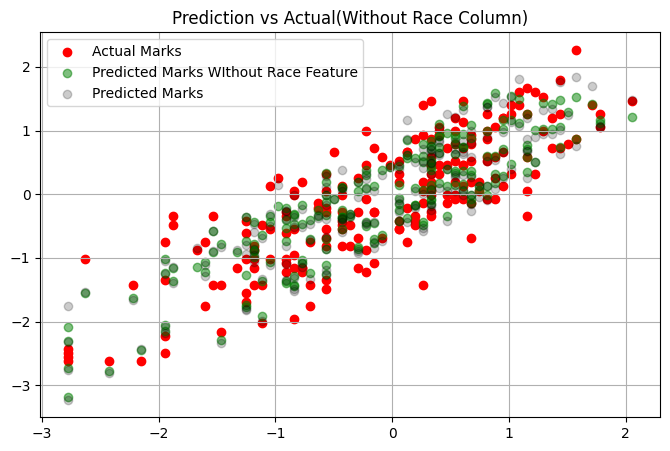

In [108]:
feature_index = 0  # Median Income
X_plot = X_test.iloc[:, feature_index]
plt.figure(figsize=(8, 5))
plt.scatter(X_plot, y_test, color='red', label='Actual Marks')
plt.scatter(X_plot, y_pred, color='green', alpha=0.5, label='Predicted Marks WIthout Race Feature')
plt.scatter(X_plot, y_pred1, color='black', alpha=0.2, label='Predicted Marks')


plt.title('Prediction vs Actual(Without Race Column)')
plt.legend()
plt.grid(True)
plt.show()

## With Reading and WRITING

What if we dropped reading and writing score scaled data features from dataset

In [113]:


Xf = final_data.drop(columns=['math score_scaled','reading score_scaled','writing score_scaled'])

# Target variable
yf = final_data['math score_scaled']

In [114]:
print("\nSplitting dataset into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size=0.2, random_state=42)



Splitting dataset into training and test sets...


In [115]:
#Model Training
print("\nTraining Multiliear Regression model...")
modelf = LinearRegression()
modelf.fit(X_train, y_train)


Training Multiliear Regression model...


LinearRegression()

### Predicting Data

In [117]:
print("Predicting on test data...")
y_predf = modelf.predict(X_test)

Predicting on test data...


### Model Evaluation

In [118]:
mse = mean_squared_error(y_test, y_predf)
rmse = np.sqrt(mse)

In [119]:
mae = mean_absolute_error(y_test, y_predf)

In [120]:
r2 = r2_score(y_test, y_predf)
print(f"\nR-squared Score on test data: {r2:.4f}")


R-squared Score on test data: 0.1748


In [121]:
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors
adjusted_r2f = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [123]:
print(f"✅ Adjusted R² Score: {adjusted_r2f:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

✅ Adjusted R² Score: 0.1265
📉 Mean Squared Error (MSE): 0.8393
📉 Mean Absolute Error (MAE): 0.7432
📉 Root Mean Squared Error (RMSE): 0.9161


It seems that Dropping these columns isnt the best choice

## *Polynomial Regression*

In [17]:
#Xp = final_data[['reading score_scaled', 'writing score_scaled','test preparation course_none']]
Xp = final_data.drop(['math score_scaled',
                      'race/ethnicity_group B',
                      'race/ethnicity_group C',
                      'race/ethnicity_group D',
                      'race/ethnicity_group E'], axis=1)

# Define target variable
Yp = final_data['math score_scaled']

### Creaing Polynomial Feature

In [136]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(Xp)

# Splitting dataset
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_poly, Yp, test_size=0.2, random_state=42)

# Fitting polynomial regression model
model = LinearRegression()
model.fit(Xp_train, yp_train)

# Predictin Model
y_predp = model.predict(Xp_test)

### Model Evaluation

RMSE

In [137]:
mse = mean_squared_error(yp_test, y_predp)
rmse = np.sqrt(mse)

MAE

In [138]:
mae = mean_absolute_error(yp_test, y_predp)

R² score.

In [139]:
r2 = r2_score(yp_test, y_predp)
print(f"\nR-squared Score on test data: {r2:.4f}")


R-squared Score on test data: 0.8412


In [140]:

print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

📉 Mean Squared Error (MSE): 0.1682
📉 Mean Absolute Error (MAE): 0.3263
📉 Root Mean Squared Error (RMSE): 0.4102


Visualization

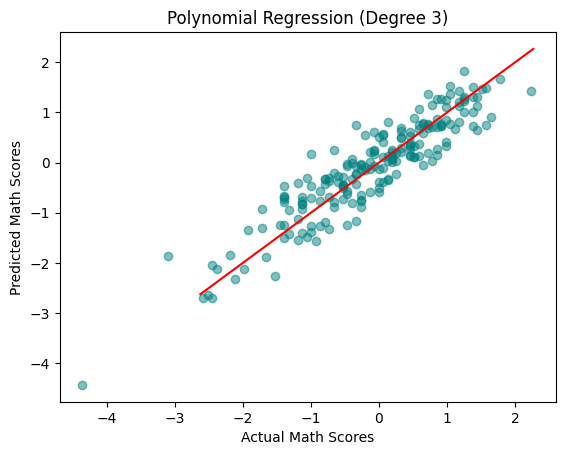

In [141]:
plt.scatter(yp_test, y_predp, color='teal', alpha=0.5)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Polynomial Regression (Degree 3)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # line y = x
plt.show()

**degree-3 polynomial regression shows excellent performance.
There is no strong sign of overfitting based on the test results.
The model is a good fit for the data — especially after feature scaling and transformation.**